In [ ]:
#conexiunea cu drive-ul 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rasterio

In [ ]:
!pip install earthpy


In [ ]:
#import librari necesare
import os
from glob import glob
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
from numpy import clip
from skimage import exposure
from osgeo import gdal
#import arcpy
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from PIL import Image
import scipy

In [ ]:
#extragere benzi necesare cu o rezolutie spectrala de 20m 
band4 = rasterio.open('/content/drive/MyDrive/BENZI/CONSTANTA_14_09_2020/B4.jp2', driver='JP2OpenJPEG') #blue / RED for True Color
band11 = rasterio.open('/content/drive/MyDrive/BENZI/CONSTANTA_14_09_2020/B11.jp2', driver='JP2OpenJPEG') #green & SWIR 
band12= rasterio.open('/content/drive/MyDrive/BENZI/CONSTANTA_14_09_2020/B12.jp2', driver='JP2OpenJPEG') #red 
band8= rasterio.open('/content/drive/MyDrive/BENZI/CONSTANTA_14_09_2020/B8A.jp2', driver='JP2OpenJPEG') #nir 

band2 = rasterio.open('/content/drive/MyDrive/BENZI/CONSTANTA_14_09_2020/B2.jp2', driver='JP2OpenJPEG') #BLUE
band3= rasterio.open('/content/drive/MyDrive/BENZI/CONSTANTA_14_09_2020/B3.jp2', driver='JP2OpenJPEG') #GREEN


In [ ]:
#afisarea fiecarei benzi B2,B3,B4 (uint16)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues', title='albastru')
plot.show(band3, ax=ax2, cmap='Greens',title='verde')
plot.show(band4, ax=ax3, cmap='Reds', title='rosu')
fig.tight_layout()

In [ ]:
#imaginea true color in 16 biti
trueColor = rasterio.open(r'TrueColorOutput.tiff', 'w', driver='Gtiff',
                          width=band4.width, height=band4.height,
                          count=3,
                          crs=band4.crs,
                          transform=band4.transform,
                          dtype='uint16'                  
                         )
trueColor.write(band4.read(1),1) #Red
trueColor.write(band3.read(1),2) #Green
trueColor.write(band2.read(1),3) #Blue
trueColor.close()

In [ ]:
#afisarea imaginii false color pe 8 biti
rgb = rasterio.open('TrueColorOutput.tiff', count = 3)
plot.show(rgb)

In [ ]:
#crearea imaginii pe 8 biti
img = np.empty([band2.width,band2.height, 3], dtype='uint8')
img[:,:,0] = np.uint8(exposure.equalize_hist(band4.read(1))*256)
img[:,:,1] = np.uint8(exposure.equalize_hist(band3.read(1))*256)
img[:,:,2] = np.uint8(exposure.equalize_hist(band2.read(1))*256)

In [ ]:
im1 = Image.fromarray(img) #convertim din array in imagine sa o putem salva cu functia save din pillow
im1.save(r"/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/b234.bmp") #salvarea imaginii pe 8 biti 
#im1.save("b234.tif") #salvarea imaginii pe 8 biti 

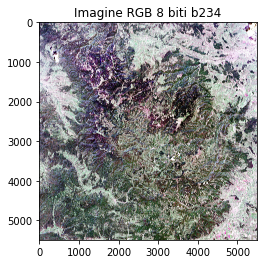

In [ ]:
#afisam imaginea rgb B234
plt.figure()
plt.imshow(im1)
plt.title('Imagine RGB 8 biti b234',fontsize=12)
plt.show()

In [ ]:
#determinarea dimensiunilor pozelor 
imagine = Image.open(r"/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/b234.bmp")
width, height = imagine.size
print(width)
print(height)

5490
5490


In [ ]:
# decuparea propriu zisa si salvarea rezultatelor
imgx = Image.open("/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/b234.bmp")

#img2=imgx.crop((0,0,2000,5000)) #PENTRU IMAGINEA MARE
img2=imgx.crop((4656,590,5200,1062))
# left, top, right, bottom
img2.save("/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/b234_cropped.bmp",quality=95)

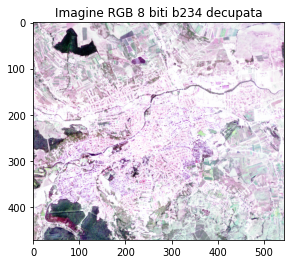

In [ ]:
#afisare imagine b234 8 biti decupata
plt.figure()
plt.imshow(img2)
plt.title('Imagine RGB 8 biti b234 decupata',fontsize=12)
plt.show()

In [ ]:
#afisarea fiecarei benzi B12,B11,B4 (uint16)
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band4, ax=ax1, cmap='Blues')
plot.show(band11, ax=ax2, cmap='Greens')
plot.show(band12, ax=ax3, cmap='Reds')
fig1.tight_layout()

In [ ]:
#imaginea false color in 16 biti
falseColor = rasterio.open(r'FalseColorOutput.tiff','w',driver='Gtiff',
                         width=band12.width, height=band12.height,
                         count=3,
                         crs=band12.crs,
                         transform=band12.transform,
                          dtype='uint16' 
                         )
falseColor.write(band12.read(1),1) #red
falseColor.write(band11.read(1),2) #green
falseColor.write(band4.read(1),3) #blue
falseColor.close()

In [ ]:
#afisarea imaginii false color pe 16 biti
rgb = rasterio.open(r'FalseColorOutput.tiff', count = 3)
plot.show(rgb)

In [ ]:
#crearea imaginii pe 8 biti
img1 = np.empty([band8.width,band8.height, 3], dtype='uint8')
img1[:,:,0] = np.uint8(exposure.equalize_hist(band12.read(1))*256)#rosu
img1[:,:,1] = np.uint8(exposure.equalize_hist(band11.read(1))*256)#verde
img1[:,:,2] = np.uint8(exposure.equalize_hist(band4.read(1))*256)# #albastru #aici e tot banda 4

In [ ]:
#salvare imagine pe 8 biti
im = Image.fromarray(img1)
im.save("/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/b41112.bmp")

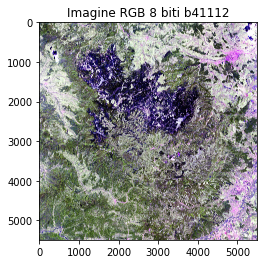

In [ ]:
#afisam imaginea rgb B11124
plt.figure()
plt.imshow(im)
plt.title('Imagine RGB 8 biti b41112',fontsize=12)
plt.show()

In [ ]:
# decuparea propriu zisa si salvarea rezultatelor
img3= Image.open("/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/b41112.bmp")
img4=img3.crop((4656,590,5200,1062))
# left, top, right, bottom
img4.save("/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/b41112_cropped.bmp",quality=95)

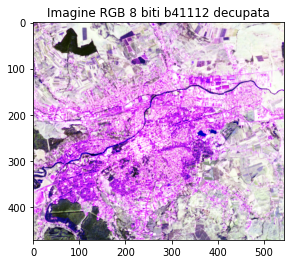

In [ ]:
plt.figure()
plt.imshow(img4)
plt.title('Imagine RGB 8 biti b41112 decupata',fontsize=12)
plt.show()

In [ ]:
#afisare B8 , B11 pe 16 biti
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot.show(band8, ax=ax1)
plot.show(band11, ax=ax2)
fig1.tight_layout()
#b8_2=band8.crop((4673,687,5137,1050))

In [ ]:
#citim banda 8 drept NIR => b8
b8=band8.read(1)

In [ ]:
#verificam ca am schimbat tipul benzii din rasterio.io.DatasetReader in numpy.ndarray
type(b8)

numpy.ndarray

In [ ]:
#citim banda 11 drept SWIR => b11
b11=band11.read(1)

In [ ]:
#verificam ca am schimbat tipul benzii din rasterio.io.DatasetReader in numpy.ndarray
type(b11)

numpy.ndarray

In [ ]:
#valorile benzii inainte de redimensionare si transformare in 8biti
b8

array([[2308, 2394, 2251, ...,  134,  136,  137],
       [2331, 2424, 2297, ...,  128,  127,  142],
       [2289, 2394, 2342, ...,  121,  142,  132],
       ...,
       [ 107,  107,  105, ...,  216,  243,  234],
       [ 105,  108,  112, ...,  211,  218,  210],
       [ 114,  108,  118, ...,  195,  241,  243]], dtype=uint16)

In [ ]:
B8=np.uint8(exposure.equalize_hist(b8)*256)#tranformarea in 8 biti 

In [ ]:
B8 #afisarea valorilor pentru banda tranformata

array([[242, 244, 240, ...,  81,  85,  87],
       [242, 245, 241, ...,  70,  68,  96],
       [241, 244, 243, ...,  57,  96,  77],
       ...,
       [ 34,  34,  31, ..., 192, 197, 196],
       [ 31,  36,  42, ..., 190, 193, 189],
       [ 45,  36,  52, ..., 179, 197, 197]], dtype=uint8)

In [ ]:
b11

array([[3545, 3667, 3546, ...,  140,  145,  136],
       [3551, 3702, 3570, ...,  129,  140,  132],
       [3568, 3643, 3639, ...,  135,  144,  129],
       ...,
       [  96,  102,  106, ...,  225,  232,  225],
       [ 101,   97,   95, ...,  201,  206,  221],
       [  91,  103,  102, ...,  206,  221,  232]], dtype=uint16)

In [ ]:
B11=np.uint8(exposure.equalize_hist(b11)*256)

In [ ]:
B11

array([[245, 248, 245, ...,  94, 108,  85],
       [245, 249, 245, ...,  68,  94,  74],
       [245, 247, 247, ...,  82, 105,  68],
       ...,
       [ 11,  18,  24, ..., 197, 197, 197],
       [ 17,  12,   9, ..., 191, 193, 196],
       [  7,  19,  18, ..., 193, 196, 197]], dtype=uint8)

In [ ]:
#transformam benzile in valori float din int
B11=B11.astype(float)
B8=B8.astype(float)

In [ ]:
B11

array([[245., 248., 245., ...,  94., 108.,  85.],
       [245., 249., 245., ...,  68.,  94.,  74.],
       [245., 247., 247., ...,  82., 105.,  68.],
       ...,
       [ 11.,  18.,  24., ..., 197., 197., 197.],
       [ 17.,  12.,   9., ..., 191., 193., 196.],
       [  7.,  19.,  18., ..., 193., 196., 197.]])

In [ ]:
B8

array([[242., 244., 240., ...,  81.,  85.,  87.],
       [242., 245., 241., ...,  70.,  68.,  96.],
       [241., 244., 243., ...,  57.,  96.,  77.],
       ...,
       [ 34.,  34.,  31., ..., 192., 197., 196.],
       [ 31.,  36.,  42., ..., 190., 193., 189.],
       [ 45.,  36.,  52., ..., 179., 197., 197.]])

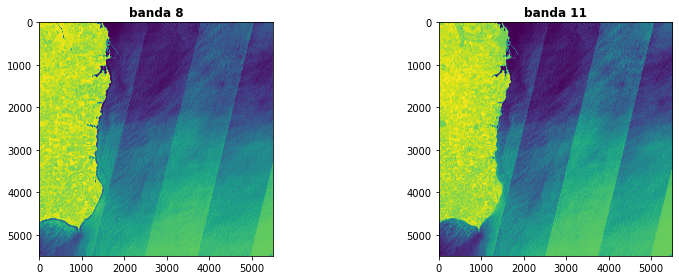

In [ ]:
#afisare B8 , B11 pe 8 biti
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot.show(B8, ax=ax1,title="banda 8")
plot.show(B11, ax=ax2,title="banda 11")
fig2.tight_layout()

In [ ]:
#Allow 0 division in numpy
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [ ]:
# initializare imagine NDBI
ndbi = np.empty(band8.shape, dtype='uint8')


In [ ]:
check = np.logical_or (B8 > 0, B11 > 0 )

In [ ]:
ndbi = np.where( check,(B11-B8)/(B11+B8) , -1) #augumentata
ndbi1 = np.where( check,(B11-B8)/(B11+B8) , -1) #neaugumentata

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
ndbi

array([[ 0.00616016,  0.00813008,  0.01030928, ...,  0.07428571,
         0.11917098, -0.01162791],
       [ 0.00616016,  0.00809717,  0.00823045, ..., -0.01449275,
         0.16049383, -0.12941176],
       [ 0.00823045,  0.00610998,  0.00816327, ...,  0.17985612,
         0.04477612, -0.06206897],
       ...,
       [-0.51111111, -0.30769231, -0.12727273, ...,  0.01285347,
         0.        ,  0.00254453],
       [-0.29166667, -0.5       , -0.64705882, ...,  0.00262467,
         0.        ,  0.01818182],
       [-0.73076923, -0.30909091, -0.48571429, ...,  0.03763441,
        -0.00254453,  0.        ]])

In [ ]:
#calculam valoarea medie
mean=ndbi.mean()
print(mean)

-0.0024469735977656285


In [ ]:
 #calculam std
 std=ndbi.std()
 print(std)

0.19643130800135322


In [ ]:
type(ndbi)

numpy.ndarray

In [ ]:
#global standardization 
ndbi = (ndbi - mean) / std

In [ ]:
ndbi

array([[ 0.23552518,  0.2865788 ,  0.34305625, ...,  2.00111008,
         3.16438516, -0.22548174],
       [ 0.23552518,  0.28572575,  0.28918009, ..., -0.29972892,
         4.23533412, -3.27804278],
       [ 0.28918009,  0.23422457,  0.28743882, ...,  4.73713944,
         1.23632073, -1.53274415],
       ...,
       [-5.07838102, -5.07838102, -3.22260613, ...,  0.40899314,
         0.07587446,  0.1418201 ],
       [-5.07838102, -5.07838102, -5.07838102, ...,  0.14389712,
         0.07587446,  0.54708598],
       [-5.07838102, -5.07838102, -5.07838102, ...,  1.05123163,
         0.00992883,  0.07587446]])

In [ ]:
# clip pixel values to [-1,1]
ndbi = clip(ndbi, -1.0, 1.0)

In [ ]:
ndbi

array([[ 0.23552518,  0.2865788 ,  0.34305625, ...,  1.        ,
         1.        , -0.22548174],
       [ 0.23552518,  0.28572575,  0.28918009, ..., -0.29972892,
         1.        , -1.        ],
       [ 0.28918009,  0.23422457,  0.28743882, ...,  1.        ,
         1.        , -1.        ],
       ...,
       [-1.        , -1.        , -1.        , ...,  0.40899314,
         0.07587446,  0.1418201 ],
       [-1.        , -1.        , -1.        , ...,  0.14389712,
         0.07587446,  0.54708598],
       [-1.        , -1.        , -1.        , ...,  1.        ,
         0.00992883,  0.07587446]])

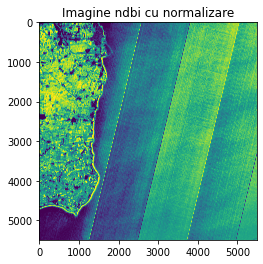

In [ ]:
plt.imshow(ndbi,vmin=-1, vmax=1)
plt.title('Imagine ndbi cu normalizare',fontsize=12)
plt.show()

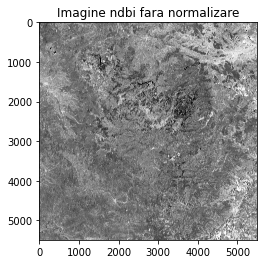

In [ ]:
plt.imshow(ndbi1,vmin=-1, vmax=1,cmap='gray')
plt.title('Imagine ndbi fara normalizare',fontsize=12)
plt.show()

In [ ]:
#scipy.misc.toimage(ndbi,cmin=0,cmax=255).save("NDBI_uncropped.bmp") this is deprecated
NDBI=Image.fromarray((((ndbi+1)/2)*255).astype('uint8'))
NDBI.save(r'/content/drive/MyDrive/REZULTATE/NDBI_uncropped.bmp',quality=95)
#NDBI.convert('P').save('NDBI_uncropped.bmp',format = 'bmp')

In [ ]:
z=np.asarray(NDBI)
z

array([[157, 164, 171, ..., 255, 255,  98],
       [157, 163, 164, ...,  89, 255,   0],
       [164, 157, 164, ..., 255, 255,   0],
       ...,
       [  0,   0,   0, ..., 179, 137, 145],
       [  0,   0,   0, ..., 145, 137, 197],
       [  0,   0,   0, ..., 255, 128, 137]], dtype=uint8)

In [ ]:
# decuparea propriu zisa si salvarea rezultatelor
decupare= Image.open("/content/drive/MyDrive/REZULTATE/NDBI_uncropped.bmp")
img4=decupare.crop((1202,0,1675,886))
img4.save("/content/drive/MyDrive/REZULTATE/NDBI_cropped.bmp",quality=95)


In [ ]:
#pt cazul cand imaginea pe care o vrem e imaginea in sine 
decupare= Image.open("/content/drive/MyDrive/REZULTATE/POZE/M_CLUJ_30_08_2018/NDBI_uncropped.bmp")
i=np.asarray(decupare)
plt.imshow(decupare)
img4=np.asarray(decupare)
print(i)

In [ ]:
i=np.asarray(img4)
i

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 242, 250, 194],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

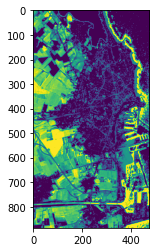

In [ ]:
plt.imshow(img4)


In [ ]:
img4=np.asarray(img4)

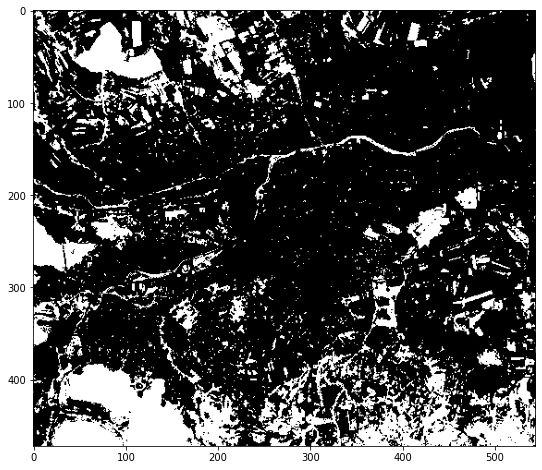

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(9,9))
x=np.where(img4>230,0,255)
plt.imshow(x,cmap='gray')
#masca pentru imagine necentralizata

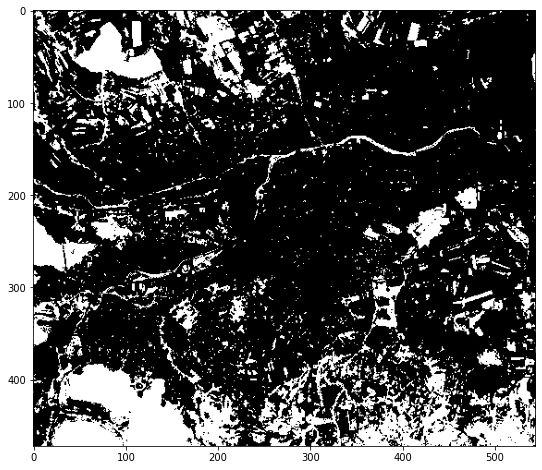

In [ ]:
NDBI1=Image.fromarray((((ndbi+1)/2)*255).astype('uint8'))
figure(figsize=(9,9))
NDBI1.save(r'/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/NDBI1_uncropped.bmp',quality=95)
decupare= Image.open("/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/NDBI1_uncropped.bmp")
img5=decupare.crop((4656,590,5200,1062))
img5.save("/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/NDBI1_cropped.bmp",quality=95)
img5=np.asarray(img5)
#img5=np.asarray(decupare) #asta e pt cand facem imagini mari
y=np.where(img5>230,0,255)
plt.imshow(y,cmap='gray')
#masca pentru imagine centralizata

In [ ]:
mask=Image.fromarray(x.astype('uint8'))

In [ ]:
mask.save("/content/drive/MyDrive/REZULTATE/POZE/S_CLUJ_29_08_2020/mask.bmp",quality=95)